## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   5.679311   315.680418  0.912690  5.993056  1.711779
1  39.634058  1725.600831  0.998976  6.384766  1.653553
2  24.696093   440.511411  0.910117  5.635368  1.590585
3  33.818370   772.964964  0.440387  5.416149  1.322570
4  62.254789   982.780883  0.514259  9.519242  1.453240


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.00673 | train_mse: 2.42598 | train_mae: 1.15724 |  0:00:00s
epoch 1  | loss: 0.52308 | train_mse: 2.24751 | train_mae: 1.18209 |  0:00:00s
epoch 2  | loss: 0.81015 | train_mse: 1.52976 | train_mae: 0.99294 |  0:00:00s


epoch 3  | loss: 0.37255 | train_mse: 1.59905 | train_mae: 1.00618 |  0:00:00s
epoch 4  | loss: 0.50614 | train_mse: 1.33204 | train_mae: 0.85465 |  0:00:00s
epoch 5  | loss: 0.3655  | train_mse: 1.00122 | train_mae: 0.72586 |  0:00:00s


epoch 6  | loss: 0.35152 | train_mse: 0.87356 | train_mae: 0.69195 |  0:00:00s
epoch 7  | loss: 0.41702 | train_mse: 0.84273 | train_mae: 0.66269 |  0:00:00s
epoch 8  | loss: 0.23641 | train_mse: 1.13167 | train_mae: 0.6962  |  0:00:00s


epoch 9  | loss: 0.25615 | train_mse: 1.16301 | train_mae: 0.78702 |  0:00:01s
epoch 10 | loss: 0.17624 | train_mse: 0.67603 | train_mae: 0.62905 |  0:00:01s
epoch 11 | loss: 0.27603 | train_mse: 0.36392 | train_mae: 0.46481 |  0:00:01s


epoch 12 | loss: 0.24806 | train_mse: 0.51059 | train_mae: 0.56058 |  0:00:01s
epoch 13 | loss: 0.23991 | train_mse: 0.7104  | train_mae: 0.64466 |  0:00:01s
epoch 14 | loss: 0.27337 | train_mse: 0.65653 | train_mae: 0.61759 |  0:00:01s


epoch 15 | loss: 0.1776  | train_mse: 0.42014 | train_mae: 0.50257 |  0:00:01s
epoch 16 | loss: 0.17191 | train_mse: 0.41508 | train_mae: 0.49943 |  0:00:01s
epoch 17 | loss: 0.18528 | train_mse: 0.53884 | train_mae: 0.53397 |  0:00:01s


epoch 18 | loss: 0.19573 | train_mse: 0.56863 | train_mae: 0.53546 |  0:00:01s
epoch 19 | loss: 0.14068 | train_mse: 0.43941 | train_mae: 0.48508 |  0:00:01s
epoch 20 | loss: 0.13013 | train_mse: 0.29132 | train_mae: 0.40918 |  0:00:02s


epoch 21 | loss: 0.1133  | train_mse: 0.27509 | train_mae: 0.40124 |  0:00:02s
epoch 22 | loss: 0.09794 | train_mse: 0.31036 | train_mae: 0.40673 |  0:00:02s
epoch 23 | loss: 0.08875 | train_mse: 0.25003 | train_mae: 0.37433 |  0:00:02s


epoch 24 | loss: 0.15321 | train_mse: 0.1748  | train_mae: 0.32576 |  0:00:02s
epoch 25 | loss: 0.1145  | train_mse: 0.14159 | train_mae: 0.29141 |  0:00:02s
epoch 26 | loss: 0.23542 | train_mse: 0.15948 | train_mae: 0.32731 |  0:00:02s


epoch 27 | loss: 0.08718 | train_mse: 0.16929 | train_mae: 0.33889 |  0:00:02s
epoch 28 | loss: 0.12906 | train_mse: 0.13777 | train_mae: 0.28969 |  0:00:02s
epoch 29 | loss: 0.11012 | train_mse: 0.13051 | train_mae: 0.27691 |  0:00:02s


epoch 30 | loss: 0.14078 | train_mse: 0.12416 | train_mae: 0.27796 |  0:00:02s
epoch 31 | loss: 0.1646  | train_mse: 0.106   | train_mae: 0.26495 |  0:00:03s
epoch 32 | loss: 0.11444 | train_mse: 0.08655 | train_mae: 0.23747 |  0:00:03s


epoch 33 | loss: 0.10523 | train_mse: 0.0829  | train_mae: 0.22339 |  0:00:03s
epoch 34 | loss: 0.08966 | train_mse: 0.07963 | train_mae: 0.21873 |  0:00:03s
epoch 35 | loss: 0.10256 | train_mse: 0.07924 | train_mae: 0.21752 |  0:00:03s


epoch 36 | loss: 0.07267 | train_mse: 0.07821 | train_mae: 0.21762 |  0:00:03s
epoch 37 | loss: 0.21398 | train_mse: 0.07493 | train_mae: 0.21092 |  0:00:03s
epoch 38 | loss: 0.26309 | train_mse: 0.06389 | train_mae: 0.19388 |  0:00:03s


epoch 39 | loss: 0.15536 | train_mse: 0.06253 | train_mae: 0.19371 |  0:00:03s
epoch 40 | loss: 0.11145 | train_mse: 0.06378 | train_mae: 0.19663 |  0:00:03s
epoch 41 | loss: 0.07675 | train_mse: 0.06202 | train_mae: 0.19659 |  0:00:03s


epoch 42 | loss: 0.09996 | train_mse: 0.06975 | train_mae: 0.202   |  0:00:03s
epoch 43 | loss: 0.15607 | train_mse: 0.08982 | train_mae: 0.22443 |  0:00:04s
epoch 44 | loss: 0.16336 | train_mse: 0.08306 | train_mae: 0.21924 |  0:00:04s


epoch 45 | loss: 0.19853 | train_mse: 0.06085 | train_mae: 0.19462 |  0:00:04s
epoch 46 | loss: 0.11228 | train_mse: 0.05975 | train_mae: 0.19905 |  0:00:04s
epoch 47 | loss: 0.11704 | train_mse: 0.06855 | train_mae: 0.21305 |  0:00:04s


epoch 48 | loss: 0.23305 | train_mse: 0.13142 | train_mae: 0.28271 |  0:00:04s
epoch 49 | loss: 0.11482 | train_mse: 0.13048 | train_mae: 0.2846  |  0:00:04s
epoch 50 | loss: 0.13612 | train_mse: 0.10273 | train_mae: 0.25997 |  0:00:04s


epoch 51 | loss: 0.25943 | train_mse: 0.09311 | train_mae: 0.24321 |  0:00:04s
epoch 52 | loss: 0.26777 | train_mse: 0.11064 | train_mae: 0.26353 |  0:00:04s
epoch 53 | loss: 0.20828 | train_mse: 0.12895 | train_mae: 0.27795 |  0:00:04s


epoch 54 | loss: 0.11692 | train_mse: 0.1018  | train_mae: 0.25536 |  0:00:05s
epoch 55 | loss: 0.08932 | train_mse: 0.11027 | train_mae: 0.24943 |  0:00:05s
epoch 56 | loss: 0.11651 | train_mse: 0.12001 | train_mae: 0.25113 |  0:00:05s


epoch 57 | loss: 0.11714 | train_mse: 0.12552 | train_mae: 0.26143 |  0:00:05s
epoch 58 | loss: 0.13897 | train_mse: 0.13469 | train_mae: 0.27479 |  0:00:05s
epoch 59 | loss: 0.1137  | train_mse: 0.13556 | train_mae: 0.26595 |  0:00:05s


epoch 60 | loss: 0.11129 | train_mse: 0.14905 | train_mae: 0.27139 |  0:00:05s
epoch 61 | loss: 0.21406 | train_mse: 0.17012 | train_mae: 0.28608 |  0:00:05s
epoch 62 | loss: 0.21884 | train_mse: 0.16334 | train_mae: 0.28362 |  0:00:05s


epoch 63 | loss: 0.14411 | train_mse: 0.10133 | train_mae: 0.23384 |  0:00:05s
epoch 64 | loss: 0.15963 | train_mse: 0.07063 | train_mae: 0.20385 |  0:00:05s
epoch 65 | loss: 0.10259 | train_mse: 0.07133 | train_mae: 0.21005 |  0:00:05s


epoch 66 | loss: 0.08405 | train_mse: 0.06878 | train_mae: 0.20841 |  0:00:06s
epoch 67 | loss: 0.13841 | train_mse: 0.07753 | train_mae: 0.2172  |  0:00:06s


epoch 68 | loss: 0.08789 | train_mse: 0.08476 | train_mae: 0.22147 |  0:00:06s
epoch 69 | loss: 0.10189 | train_mse: 0.08537 | train_mae: 0.21757 |  0:00:06s
epoch 70 | loss: 0.10276 | train_mse: 0.07239 | train_mae: 0.20398 |  0:00:06s


epoch 71 | loss: 0.15698 | train_mse: 0.09789 | train_mae: 0.21423 |  0:00:06s
epoch 72 | loss: 0.18824 | train_mse: 0.11982 | train_mae: 0.2352  |  0:00:06s
epoch 73 | loss: 0.17234 | train_mse: 0.13534 | train_mae: 0.2555  |  0:00:06s


epoch 74 | loss: 0.17121 | train_mse: 0.0866  | train_mae: 0.22371 |  0:00:06s
epoch 75 | loss: 0.09247 | train_mse: 0.07304 | train_mae: 0.21085 |  0:00:06s
epoch 76 | loss: 0.1653  | train_mse: 0.06711 | train_mae: 0.20725 |  0:00:06s


epoch 77 | loss: 0.11229 | train_mse: 0.06503 | train_mae: 0.20356 |  0:00:07s
epoch 78 | loss: 0.18467 | train_mse: 0.07359 | train_mae: 0.2152  |  0:00:07s
epoch 79 | loss: 0.08469 | train_mse: 0.07727 | train_mae: 0.22199 |  0:00:07s


epoch 80 | loss: 0.13821 | train_mse: 0.06637 | train_mae: 0.20849 |  0:00:07s
epoch 81 | loss: 0.13115 | train_mse: 0.07757 | train_mae: 0.21764 |  0:00:07s
epoch 82 | loss: 0.11201 | train_mse: 0.10645 | train_mae: 0.24976 |  0:00:07s


epoch 83 | loss: 0.15481 | train_mse: 0.09761 | train_mae: 0.24413 |  0:00:07s
epoch 84 | loss: 0.08337 | train_mse: 0.08944 | train_mae: 0.23726 |  0:00:07s
epoch 85 | loss: 0.27874 | train_mse: 0.06937 | train_mae: 0.21523 |  0:00:07s


epoch 86 | loss: 0.15633 | train_mse: 0.07888 | train_mae: 0.22146 |  0:00:07s
epoch 87 | loss: 0.16764 | train_mse: 0.08636 | train_mae: 0.23355 |  0:00:07s
epoch 88 | loss: 0.08115 | train_mse: 0.07375 | train_mae: 0.22396 |  0:00:07s


epoch 89 | loss: 0.16985 | train_mse: 0.06875 | train_mae: 0.21598 |  0:00:08s

Early stopping occurred at epoch 89 with best_epoch = 39 and best_train_mae = 0.19371
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

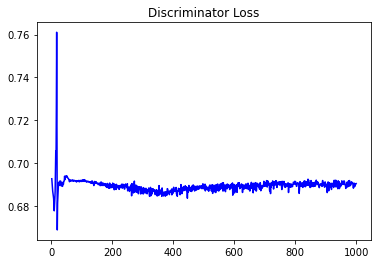

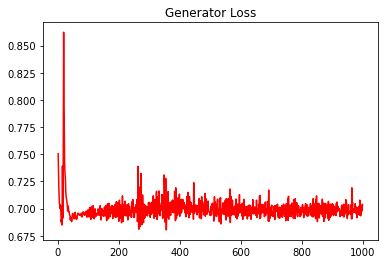

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.29870552493246777


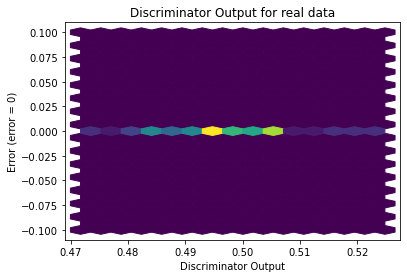

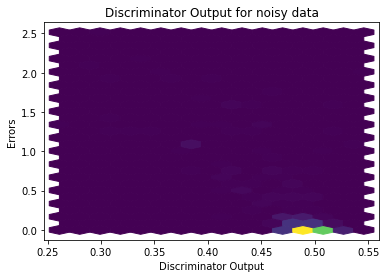

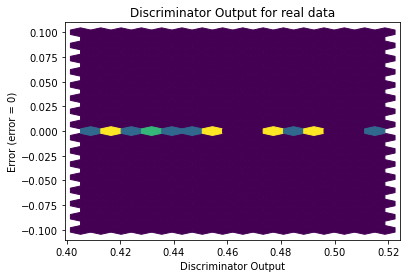

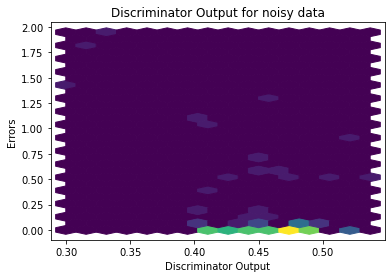

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


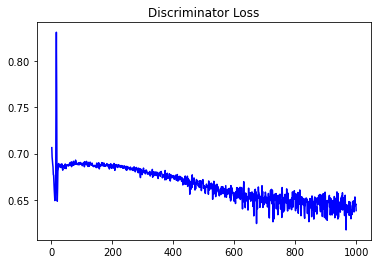

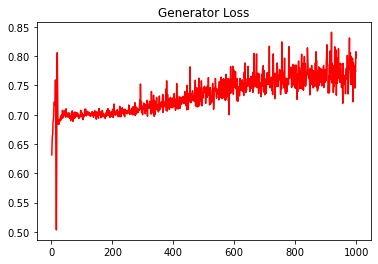

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.31393820445501164


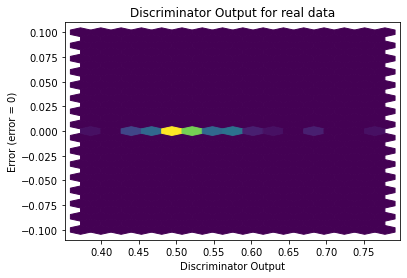

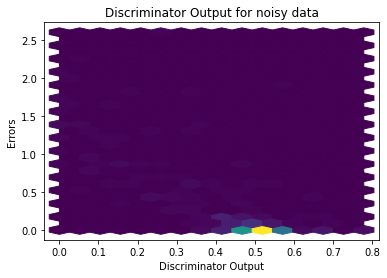

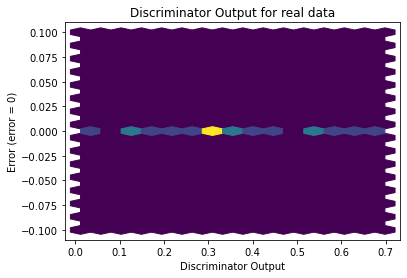

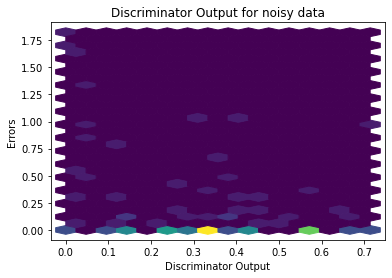

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1277]], requires_grad=True)
